<a href="https://colab.research.google.com/github/aarsh121/Analysis-of-Nobel-Laureats/blob/main/Nobel_Laurete_Visual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. The most Nobel of Prizes**


The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df=pd.read_csv('/content/nobel.csv')

In [33]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [34]:
df.shape

(911, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

As we can observe that the column data types are not appropriately represented. To address this, we either use Python's conversion function, or we can use the streamlined and efficient technique offered by the 'klib' library—a better choice in terms of simplicity, effectiveness, and time efficiency.

In [36]:
!pip install -U klib
import numpy as np
import klib as kb
clean_col_names = kb.data_cleaning(df)
clean_col_names.info()

Shape of cleaned data: (911, 18) - Remaining NAs: 1912


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-30.77%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   year                  911 non-null    int16   
 1   category              911 non-null    category
 2   prize                 911 non-null    string  
 3   motivation            823 non-null    string  
 4   prize_share           911 non-null    category
 5   laureate_id           911 non-null    int16   
 6   laureate_type         911 non-null    category
 7   full_name             911 non-null    string  
 8   birth_date            883 non-null    string  
 9   birth_city            883 non-null    string  
 

In [37]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

As we can see, there are a significant number of null values in our dataset. So, now let's try to handle them

In [38]:
df['motivation'].fillna('Unknown',inplace=True)
df['birth_city'].fillna('Unknown',inplace=True)
df['birth_country'].fillna('Unknown',inplace=True)
df['sex'].fillna('Unknown',inplace=True)

In [39]:
#Dropping unecessary columns
df.drop(
    [
        "death_date",
        "death_city",
        "death_country",
        "organization_name",
        "organization_city",
        "organization_country",
    ],
    axis=1,
    inplace=True,
)

In [40]:
df.isnull().sum()

year              0
category          0
prize             0
motivation        0
prize_share       0
laureate_id       0
laureate_type     0
full_name         0
birth_date       28
birth_city        0
birth_country     0
sex               0
dtype: int64

Filling Birth date NA

In [41]:
df['birth_date']=pd.to_datetime(df['birth_date'])
median_birth_year= df['birth_date'].dropna().dt.year.median()
df['birth_date']=df['birth_date'].fillna(pd.to_datetime(str(int(median_birth_year))+"-01-01"))


Explanation:

Imputation tailored to each column: For "motivation," we used a placeholder, and for categorical columns "birth_city," "birth_country," and "sex," we filled with "Unknown."

Dropping irrelevant columns: High-missing columns like "death_date," "death_city," "death_country" were dropped for focused analysis.

For birth year, we follow an approach of calculating the median birth year and using it to estimate missing birth dates. This considers the dataset's dynamic nature, ensuring contextual relevance and consistency in imputing birth dates while respecting unique birth years.

In [42]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male
3,1901,Peace,The Nobel Peace Prize 1901,Unknown,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male
4,1901,Peace,The Nobel Peace Prize 1901,Unknown,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male


**2. So, who gets the Nobel Prize?**

Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

(For country, we will use the birth_country of the winner, as the organization_country is NaN for all shared Nobel Prizes.)

In [43]:
print(df['prize_share'].value_counts())
print(df['sex'].value_counts())
print(df['birth_country'].value_counts().head(10))


prize_share
1/1    344
1/2    306
1/3    201
1/4     60
Name: count, dtype: int64
sex
Male       836
Female      49
Unknown     26
Name: count, dtype: int64
birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Unknown                      26
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Name: count, dtype: int64


**3. USA dominance**

Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [44]:
df['usa_winner']=df['birth_country']=='United States of America'
df['decade']=(np.floor(df['year']/10)*10).astype(int)
prop_usa=df.groupby('decade',as_index=False)['usa_winner'].mean()

display(prop_usa)


,decade,usa_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


**4. USA dominance, visualized**

A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot!

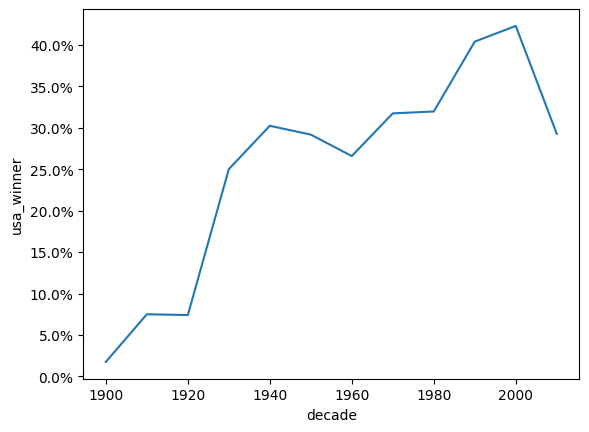

In [45]:
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

ax=sns.lineplot(x=prop_usa['decade'], y=prop_usa['usa_winner'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

**5. What is the gender of a typical Nobel Prize winner?**

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

In [46]:
df['female_win']=df['sex']=="Female"
prop_female=df.groupby(['decade','category'], as_index=False)['female_win'].mean()
display(prop_female)

,decade,category,female_win
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


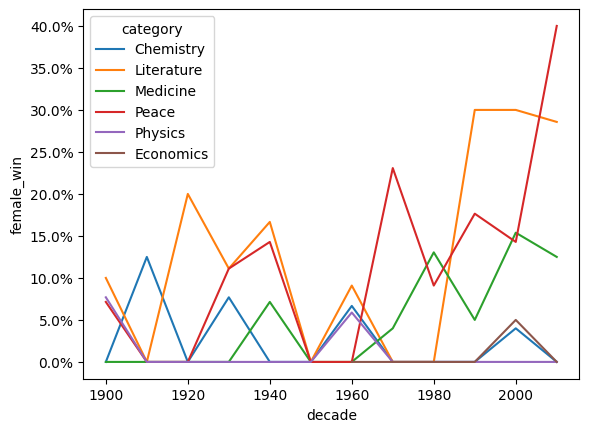

In [47]:
ax=sns.lineplot(x='decade', y='female_win',hue='category', data=prop_female)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

**6. The first woman to win the Nobel Prize**

The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [48]:
# # Picking out the first woman to win a Nobel Prize
# # To get the year from a datetime column you need to use access the dt.year value.
# # Here is an example:
# # a_data_frame['a_datatime_column'].dt.year

# # nobel['Female']

# nobel.nsmallest(1, "year")

# Filter and sort the DataFrame to include only female winners and reset the index

first_female_winn=df[df['sex']=='Female'].sort_values('year').reset_index(drop=True).iloc[0]
first_female_winn


year                                                          1903
category                                                   Physics
prize                              The Nobel Prize in Physics 1903
motivation       "in recognition of the extraordinary services ...
prize_share                                                    1/4
laureate_id                                                      6
laureate_type                                           Individual
full_name                              Marie Curie, née Sklodowska
birth_date                                     1867-11-07 00:00:00
birth_city                                                  Warsaw
birth_country                              Russian Empire (Poland)
sex                                                         Female
usa_winner                                                   False
decade                                                        1900
female_win                                                    

**7. Repeat laureates**

For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)

In [49]:
df.groupby('full_name').filter(lambda x: len(x)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,usa_winner,decade,female_win
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,Unknown,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1915-01-01,Unknown,Unknown,Unknown,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,Unknown,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,1915-01-01,Unknown,Unknown,Unknown,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,Unknown,1/1,515,Organization,Office of the United Nations High Commissioner...,1915-01-01,Unknown,Unknown,Unknown,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,Unknown,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,Unknown,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,1915-01-01,Unknown,Unknown,Unknown,False,1960,False


**8. How old are you when you get the prize?**

The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

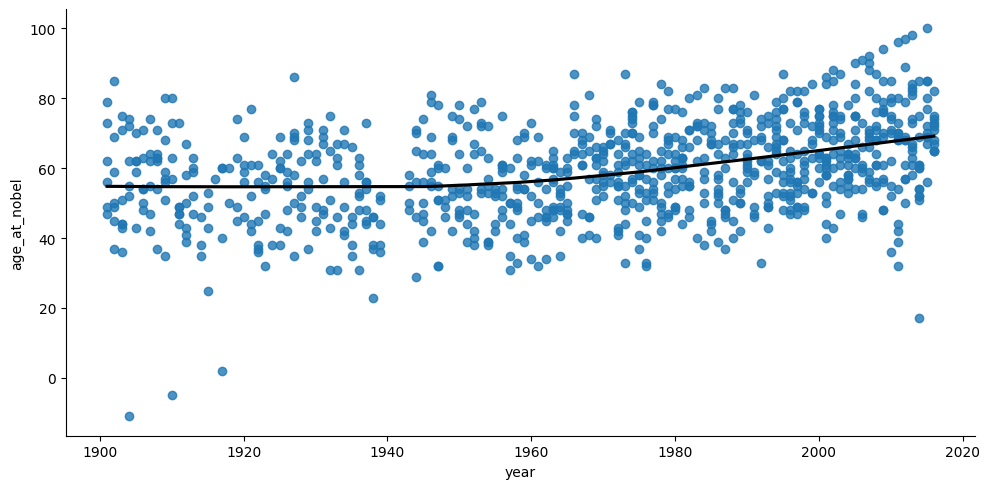

In [50]:

df['birth_date']=pd.to_datetime(df['birth_date'])
df['age_at_nobel']=df['year']-df['birth_date'].dt.year

sns.lmplot(x='year', y='age_at_nobel', data=df, lowess=True,
           aspect=2, line_kws={'color': 'black'})

**9. Age differences between prize categories**

The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

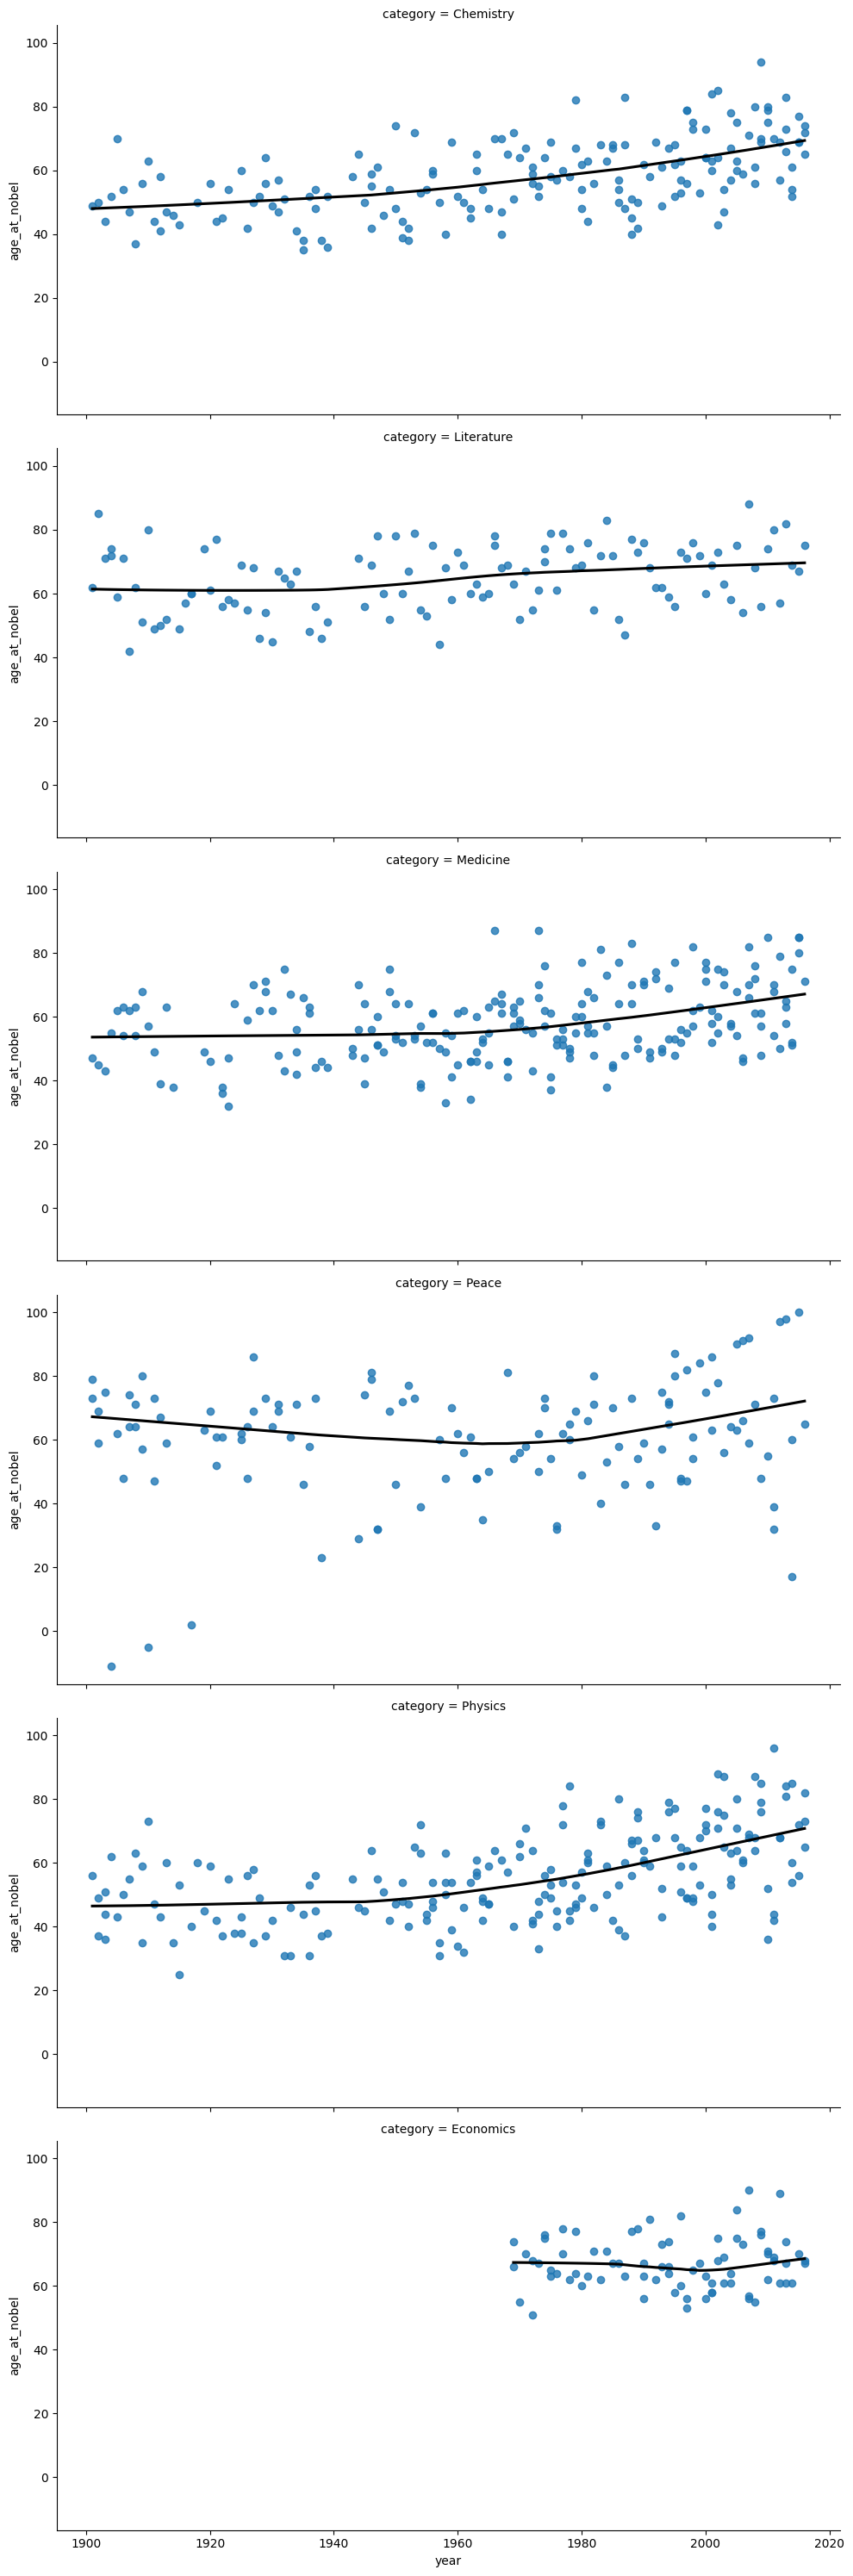

In [51]:
sns.lmplot(x='year', y='age_at_nobel', data=df, row='category',  lowess=True, aspect=2, line_kws={'color': 'black'})

**10. Oldest and youngest winners**

More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [52]:
# The oldest winner of a Nobel Prize as of 2016
display(df.nlargest(1,'age_at_nobel'))
# The youngest winner of a Nobel Prize as of 2016
display(df.nsmallest(1,'age_at_nobel'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,usa_winner,decade,female_win,age_at_nobel
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,925,Organization,National Dialogue Quartet,1915-01-01,Unknown,Unknown,Unknown,False,2010,False,100


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,usa_winner,decade,female_win,age_at_nobel
24,1904,Peace,The Nobel Peace Prize 1904,Unknown,1/1,467,Organization,Institut de droit international (Institute of ...,1915-01-01,Unknown,Unknown,Unknown,False,1900,False,-11
